In [1]:
import tensorflow as tf
physical_devices = tf.config.experimental.list_physical_devices('GPU')
print(physical_devices)
if physical_devices:
  tf.config.experimental.set_memory_growth(physical_devices[0], True)

[]


In [2]:
import matplotlib.pyplot as plt
import numpy as np
import os
import PIL #pillow to handle images 
import tensorflow as tf

In [3]:
import pathlib

In [37]:
import os
path=os.listdir(r'C:\Users\lappyfy\Downloads\dataset\data')
path

['cats', 'dogs', 'horses', 'Humans']

In [27]:
path_cats=os.listdir(r'C:\Users\lappyfy\Downloads\dataset\data\cats')

In [28]:
len(path_cats)

202

In [29]:
path_dogs=os.listdir(r'C:\Users\lappyfy\Downloads\dataset\data\dogs')

In [30]:
len(path_dogs)

202

In [39]:
data_dir=r'C:\Users\lappyfy\Downloads\dataset\data'

In [40]:
data_dir = pathlib.Path(data_dir)
data_dir

WindowsPath('C:/Users/lappyfy/Downloads/dataset/data')

In [42]:
from keras.layers import Dense,Flatten
from keras.models import Model
from tensorflow.keras.preprocessing.image import ImageDataGenerator

from keras.preprocessing.image import load_img,array_to_img,img_to_array
from keras.models import Sequential
from glob import glob

In [44]:
image_count = len(list(data_dir.glob('*/*.jpg')))
print(image_count)

808


In [45]:
list(data_dir.glob('*'))

[WindowsPath('C:/Users/lappyfy/Downloads/dataset/data/cats'),
 WindowsPath('C:/Users/lappyfy/Downloads/dataset/data/dogs'),
 WindowsPath('C:/Users/lappyfy/Downloads/dataset/data/horses'),
 WindowsPath('C:/Users/lappyfy/Downloads/dataset/data/Humans')]

In [46]:
list(data_dir.glob('cats/*'))

[WindowsPath('C:/Users/lappyfy/Downloads/dataset/data/cats/cat.1.jpg'),
 WindowsPath('C:/Users/lappyfy/Downloads/dataset/data/cats/cat.10.jpg'),
 WindowsPath('C:/Users/lappyfy/Downloads/dataset/data/cats/cat.100.jpg'),
 WindowsPath('C:/Users/lappyfy/Downloads/dataset/data/cats/cat.101.jpg'),
 WindowsPath('C:/Users/lappyfy/Downloads/dataset/data/cats/cat.102.jpg'),
 WindowsPath('C:/Users/lappyfy/Downloads/dataset/data/cats/cat.103.jpg'),
 WindowsPath('C:/Users/lappyfy/Downloads/dataset/data/cats/cat.104.jpg'),
 WindowsPath('C:/Users/lappyfy/Downloads/dataset/data/cats/cat.105.jpg'),
 WindowsPath('C:/Users/lappyfy/Downloads/dataset/data/cats/cat.106.jpg'),
 WindowsPath('C:/Users/lappyfy/Downloads/dataset/data/cats/cat.107.jpg'),
 WindowsPath('C:/Users/lappyfy/Downloads/dataset/data/cats/cat.108.jpg'),
 WindowsPath('C:/Users/lappyfy/Downloads/dataset/data/cats/cat.109.jpg'),
 WindowsPath('C:/Users/lappyfy/Downloads/dataset/data/cats/cat.11.jpg'),
 WindowsPath('C:/Users/lappyfy/Downloads/d

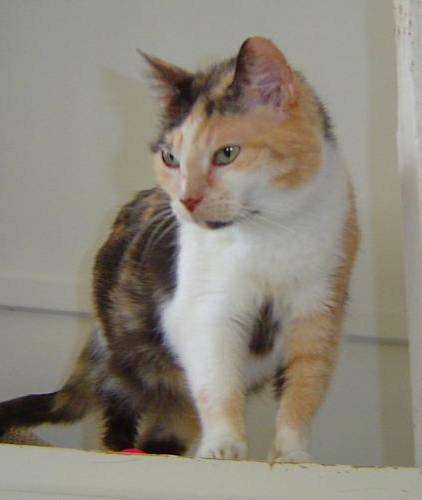

In [47]:
load_img('C:/Users/lappyfy/Downloads/dataset/data/cats/cat.130.jpg')

In [53]:
cats_count = len(list(data_dir.glob('cats/*.jpg')))
print(cats_count)

202


In [54]:
cats=list(data_dir.glob('cats/*.jpg'))

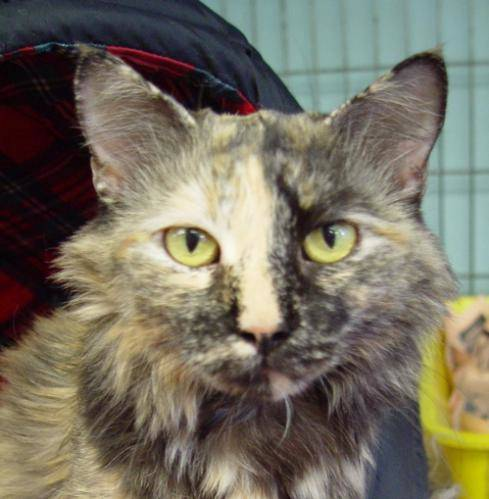

In [56]:
load_img(cats[1])

In [57]:
path

['cats', 'dogs', 'horses', 'Humans']

In [59]:
dogs=list(data_dir.glob('dogs/*.jpg'))

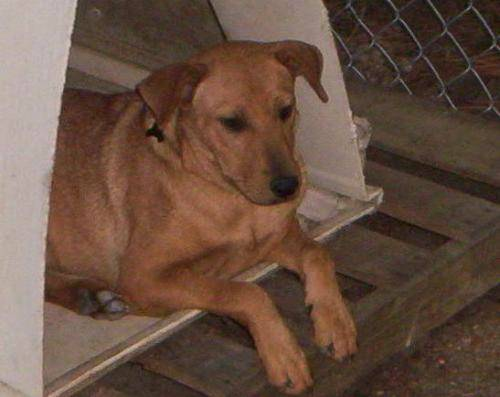

In [60]:
load_img(dogs[2])

In [61]:
horses=list(data_dir.glob('horses/*.jpg'))

In [68]:
humans=list(data_dir.glob('Humans/*.jpg'))

In [69]:
humans

[WindowsPath('C:/Users/lappyfy/Downloads/dataset/data/Humans/rider-1.jpg'),
 WindowsPath('C:/Users/lappyfy/Downloads/dataset/data/Humans/rider-10.jpg'),
 WindowsPath('C:/Users/lappyfy/Downloads/dataset/data/Humans/rider-100.jpg'),
 WindowsPath('C:/Users/lappyfy/Downloads/dataset/data/Humans/rider-101.jpg'),
 WindowsPath('C:/Users/lappyfy/Downloads/dataset/data/Humans/rider-102.jpg'),
 WindowsPath('C:/Users/lappyfy/Downloads/dataset/data/Humans/rider-103.jpg'),
 WindowsPath('C:/Users/lappyfy/Downloads/dataset/data/Humans/rider-104.jpg'),
 WindowsPath('C:/Users/lappyfy/Downloads/dataset/data/Humans/rider-105.jpg'),
 WindowsPath('C:/Users/lappyfy/Downloads/dataset/data/Humans/rider-106.jpg'),
 WindowsPath('C:/Users/lappyfy/Downloads/dataset/data/Humans/rider-107.jpg'),
 WindowsPath('C:/Users/lappyfy/Downloads/dataset/data/Humans/rider-108.jpg'),
 WindowsPath('C:/Users/lappyfy/Downloads/dataset/data/Humans/rider-109.jpg'),
 WindowsPath('C:/Users/lappyfy/Downloads/dataset/data/Humans/rider-

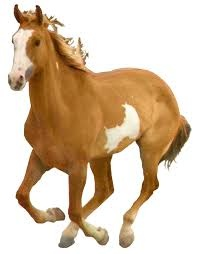

In [70]:
load_img(horses[33])

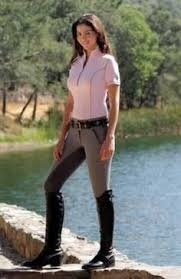

In [71]:
load_img(humans[3])

In [72]:
batch_size = 50
epochs = 50
IMG_HIEGHT = 224
IMG_WIDHT = 224

In [73]:
image_gen_train = ImageDataGenerator(rescale=1./255,
                                    rotation_range=45,
                                    width_shift_range=.15,
                                    height_shift_range=.15,
                                    horizontal_flip=True,
                                    zoom_range=0.3,
                                    validation_split=0.2)

In [74]:
train_data_gen = image_gen_train.flow_from_directory(batch_size=batch_size,
                                                    directory=data_dir,
                                                    shuffle=True,
                                                    target_size=(IMG_HIEGHT,IMG_HIEGHT),
                                                    subset='training')

Found 648 images belonging to 4 classes.


In [75]:
train_data_gen.class_indices

{'Humans': 0, 'cats': 1, 'dogs': 2, 'horses': 3}

In [76]:
image_gen_val = ImageDataGenerator(rescale=1./255,
                                  validation_split=0.2)

In [77]:
val_data_gen = image_gen_val.flow_from_directory(batch_size=batch_size,
                                                directory=data_dir,
                                                target_size=(IMG_HIEGHT,IMG_WIDHT),
                                                subset='validation')

Found 160 images belonging to 4 classes.


In [78]:
sample_img,label = next(train_data_gen)

In [79]:
sample_img.shape

(50, 224, 224, 3)

In [80]:
label

array([[0., 0., 0., 1.],
       [0., 0., 1., 0.],
       [1., 0., 0., 0.],
       [0., 1., 0., 0.],
       [0., 0., 1., 0.],
       [0., 1., 0., 0.],
       [1., 0., 0., 0.],
       [0., 0., 1., 0.],
       [0., 0., 0., 1.],
       [0., 0., 0., 1.],
       [0., 1., 0., 0.],
       [0., 1., 0., 0.],
       [1., 0., 0., 0.],
       [1., 0., 0., 0.],
       [0., 0., 0., 1.],
       [1., 0., 0., 0.],
       [0., 0., 0., 1.],
       [0., 1., 0., 0.],
       [0., 0., 0., 1.],
       [0., 0., 0., 1.],
       [0., 1., 0., 0.],
       [0., 1., 0., 0.],
       [0., 1., 0., 0.],
       [0., 1., 0., 0.],
       [0., 0., 1., 0.],
       [0., 0., 1., 0.],
       [0., 1., 0., 0.],
       [0., 0., 1., 0.],
       [1., 0., 0., 0.],
       [0., 0., 1., 0.],
       [1., 0., 0., 0.],
       [0., 0., 0., 1.],
       [1., 0., 0., 0.],
       [0., 1., 0., 0.],
       [1., 0., 0., 0.],
       [1., 0., 0., 0.],
       [1., 0., 0., 0.],
       [0., 1., 0., 0.],
       [0., 0., 1., 0.],
       [0., 0., 0., 1.],


In [88]:
from keras.layers import Conv2D,MaxPooling2D,Dropout
model = Sequential([
    Conv2D(16,3,padding='same',activation='relu',input_shape=(IMG_HIEGHT,IMG_WIDHT,3)),
    MaxPooling2D(),
    #Dropout(0.2),
    Conv2D(32,3,padding='same',activation='relu'),
    MaxPooling2D(),
    #Dropout(0.2),
    Conv2D(64,3,padding='same',activation='relu'),
    MaxPooling2D(),
    #Dropout(0.2),
    Flatten(),
    Dense(512,activation='relu'),
    Dense(256,activation='relu'),
    Dense(4,activation='softmax')
])

model.summary()

Model: "sequential_1"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━┓
┃ Layer (type)                         ┃ Output Shape                ┃         Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━┩
│ conv2d_3 (Conv2D)                    │ (None, 224, 224, 16)        │             448 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ max_pooling2d_3 (MaxPooling2D)       │ (None, 112, 112, 16)        │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ conv2d_4 (Conv2D)                    │ (None, 112, 112, 32)        │           4,640 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ max_pooling2d_4 (MaxPooling2D)       │ (None, 56, 56, 32)          │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ conv2d_5 (Conv2D)                    │ (None, 56, 56, 64)          │          18,496 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ max_pooling2d_5 (MaxPooling2D)       │ (None, 28, 28, 64)          │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ flatten_1 (Flatten)                  │ (None, 50176)               │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_3 (Dense)                      │ (None, 512)                 │      25,690,624 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_4 (Dense)                      │ (None, 256)                 │         131,328 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_5 (Dense)                      │ (None, 4)                   │           1,028 │
└──────────────────────────────────────┴─────────────────────────────┴─────────────────┘

 Total params: 25,846,564 (98.60 MB)

 Trainable params: 25,846,564 (98.60 MB)

 Non-trainable params: 0 (0.00 B)

In [89]:
model.compile(optimizer='adam',loss='categorical_crossentropy',metrics=['accuracy'])

In [96]:
filepath = 'My_multiclass_Cnn_model.keras'

In [97]:
from keras.callbacks import ModelCheckpoint
checkpoint = ModelCheckpoint(filepath=filepath,
                            monitor='val_loss',
                            verbose=1,
                            save_best_only=True,
                            mode='min')

In [98]:
callbacks = [checkpoint]

In [100]:
history = model.fit(train_data_gen,validation_data=val_data_gen,epochs=30,verbose=2,callbacks=callbacks)

Epoch 1/30

Epoch 1: val_loss improved from 0.71497 to 0.71286, saving model to My_multiclass_Cnn_model.keras
13/13 - 139s - 11s/step - accuracy: 0.7006 - loss: 0.6725 - val_accuracy: 0.7500 - val_loss: 0.7129
Epoch 2/30

Epoch 2: val_loss did not improve from 0.71286
13/13 - 154s - 12s/step - accuracy: 0.7299 - loss: 0.6595 - val_accuracy: 0.7063 - val_loss: 0.7316
Epoch 3/30

Epoch 3: val_loss did not improve from 0.71286
13/13 - 169s - 13s/step - accuracy: 0.7593 - loss: 0.5899 - val_accuracy: 0.6938 - val_loss: 0.7932
Epoch 4/30

Epoch 4: val_loss did not improve from 0.71286
13/13 - 96s - 7s/step - accuracy: 0.7701 - loss: 0.5614 - val_accuracy: 0.7063 - val_loss: 0.8397
Epoch 5/30

Epoch 5: val_loss did not improve from 0.71286
13/13 - 152s - 12s/step - accuracy: 0.7299 - loss: 0.6433 - val_accuracy: 0.6875 - val_loss: 0.7827
Epoch 6/30

Epoch 6: val_loss did not improve from 0.71286
13/13 - 118s - 9s/step - accuracy: 0.7315 - loss: 0.6508 - val_accuracy: 0.6938 - val_loss: 0.773

In [104]:
model = tf.keras.models.load_model('My_multiclass_Cnn_model.keras')

C:\Users\lappyfy\AppData\Local\Programs\Python\Python311\Lib\site-packages\keras\src\saving\saving_lib.py:757: UserWarning: Skipping variable loading for optimizer 'rmsprop', because it has 14 variables whereas the saved optimizer has 26 variables. 
  saveable.load_own_variables(weights_store.get(inner_path))


In [105]:
img = load_img(r"C:\Users\lappyfy\Downloads\download.jpg",target_size=(224,224))

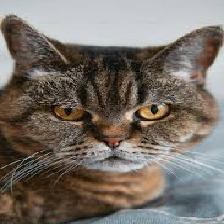

In [106]:
img

In [107]:
img_array = img_to_array(img)
img_array.shape

(224, 224, 3)

In [108]:
img_array = img_array.reshape(1,224, 224, 3)

In [110]:
class_name = ['cats', 'dogs','horses','Humans']

In [111]:
model.predict(img_array)

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 480ms/step


array([[1., 0., 0., 0.]], dtype=float32)

In [112]:
np.argmax(model.predict(img_array),axis=1)

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 115ms/step


array([0], dtype=int64)

In [114]:
img1= load_img(r"C:\Users\lappyfy\Downloads\images (3).jpg",target_size=(224,224))

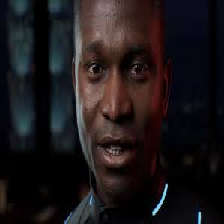

In [115]:
img1

In [119]:
img_array = img_to_array(img1)
img_array.shape

(224, 224, 3)

In [120]:
img_array = img_array.reshape(1,224, 224, 3)

In [122]:
model.predict(img_array)

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 111ms/step


array([[1., 0., 0., 0.]], dtype=float32)

In [123]:
np.argmax(model.predict(img_array),axis=1)

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 93ms/step


array([0], dtype=int64)

In [ ]:
plt.plot(history.history['accuracy'], label='accuracy')
plt.plot(history.history['val_accuracy'], label = 'val_accuracy')
plt.xlabel('Epoch')
plt.ylabel('Accuracy')
plt.ylim([0.5, 1])
plt.legend(loc='lower right')

test_loss, test_acc = model.evaluate(test_images,  test_labels, verbose=2)